In [13]:
import pandas as pd
from matplotlib import pyplot as plt
from astropy.table import Table as Tb
%matplotlib notebook

In [14]:
from scipy import stats

In [15]:
with open('Sample_0701222022-07-18 10.53.25.712_A0000 test.csv') as f:
    df = pd.read_csv(f)
df

,Protocol Time Stamp(s),Data channel 1 (µm),Data channel 2 (µm),State channel 1
0,2022-07-18 10:53:25.687096,1859.86852,611.57767,0
1,2022-07-18 10:53:25.696696,1859.87090,611.57779,0
2,2022-07-18 10:53:25.706296,1859.87126,611.57683,0
3,2022-07-18 10:53:25.715896,1859.87150,611.57683,0
4,2022-07-18 10:53:25.725496,1859.87126,611.57683,0
...,...,...,...,...
384133,2022-07-18 11:54:53.357022,1839.56145,591.98216,0
384134,2022-07-18 11:54:53.366622,1839.56145,591.98085,0
384135,2022-07-18 11:54:53.376222,1839.56229,591.98085,0
384136,2022-07-18 11:54:53.385822,1839.56336,591.98097,0


In [16]:
time = pd.to_datetime(df["Protocol Time Stamp(s)"])

In [17]:
deltaTime = time - time[0]

<IPython.core.display.Javascript object>


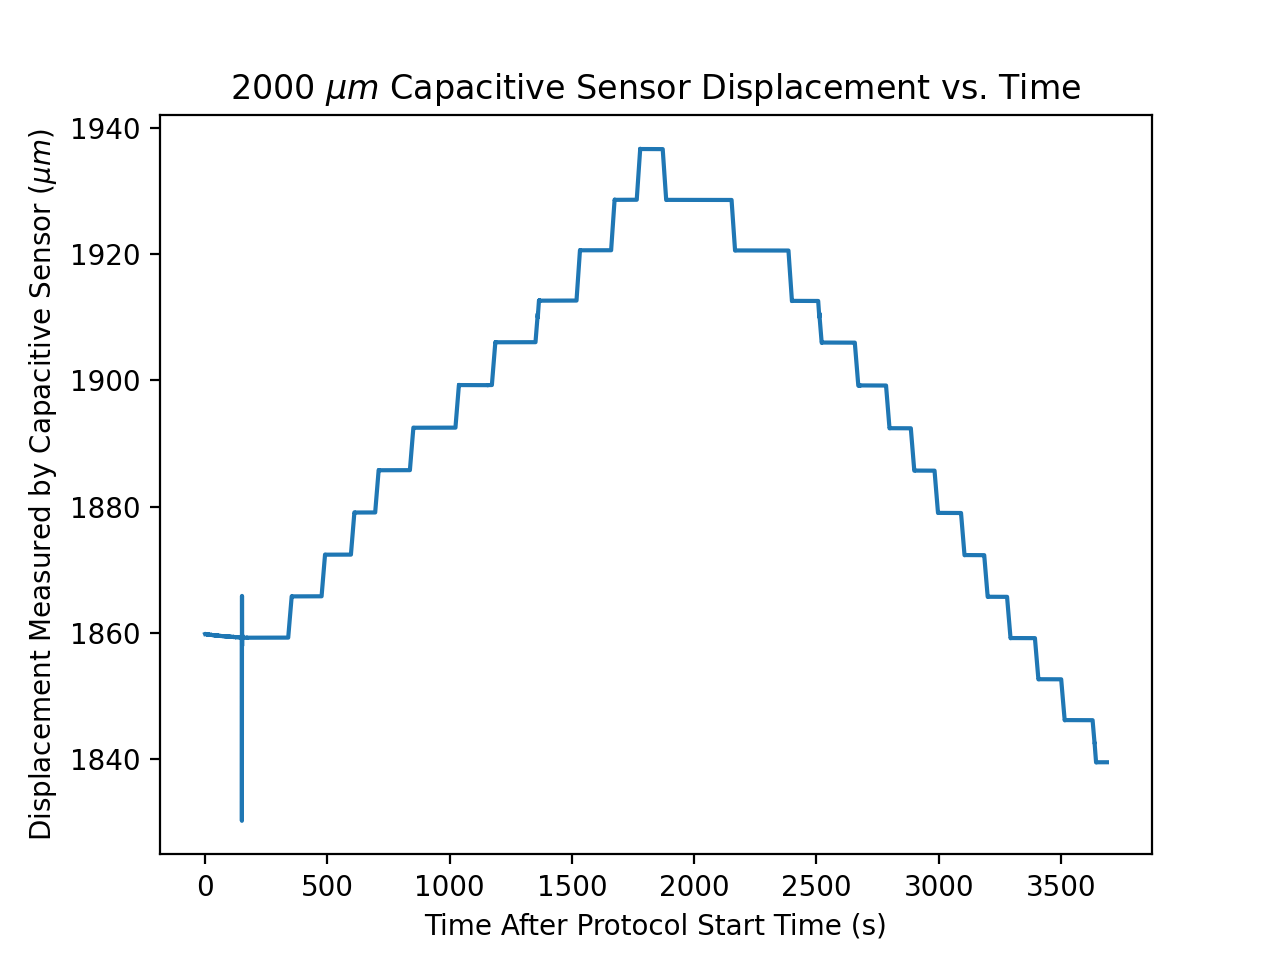

Text(0.5, 1.0, '2000 $\\mu m$ Capacitive Sensor Displacement vs. Time')

In [18]:
plt.figure()
plt.plot(deltaTime.dt.total_seconds(),df[" Data channel 1 (µm)"])

plt.xlabel('Time After Protocol Start Time (s)')
plt.ylabel('Displacement Measured by Capacitive Sensor $(\mu m)$')
plt.title('2000 $\mu m$ Capacitive Sensor Displacement vs. Time')

<IPython.core.display.Javascript object>


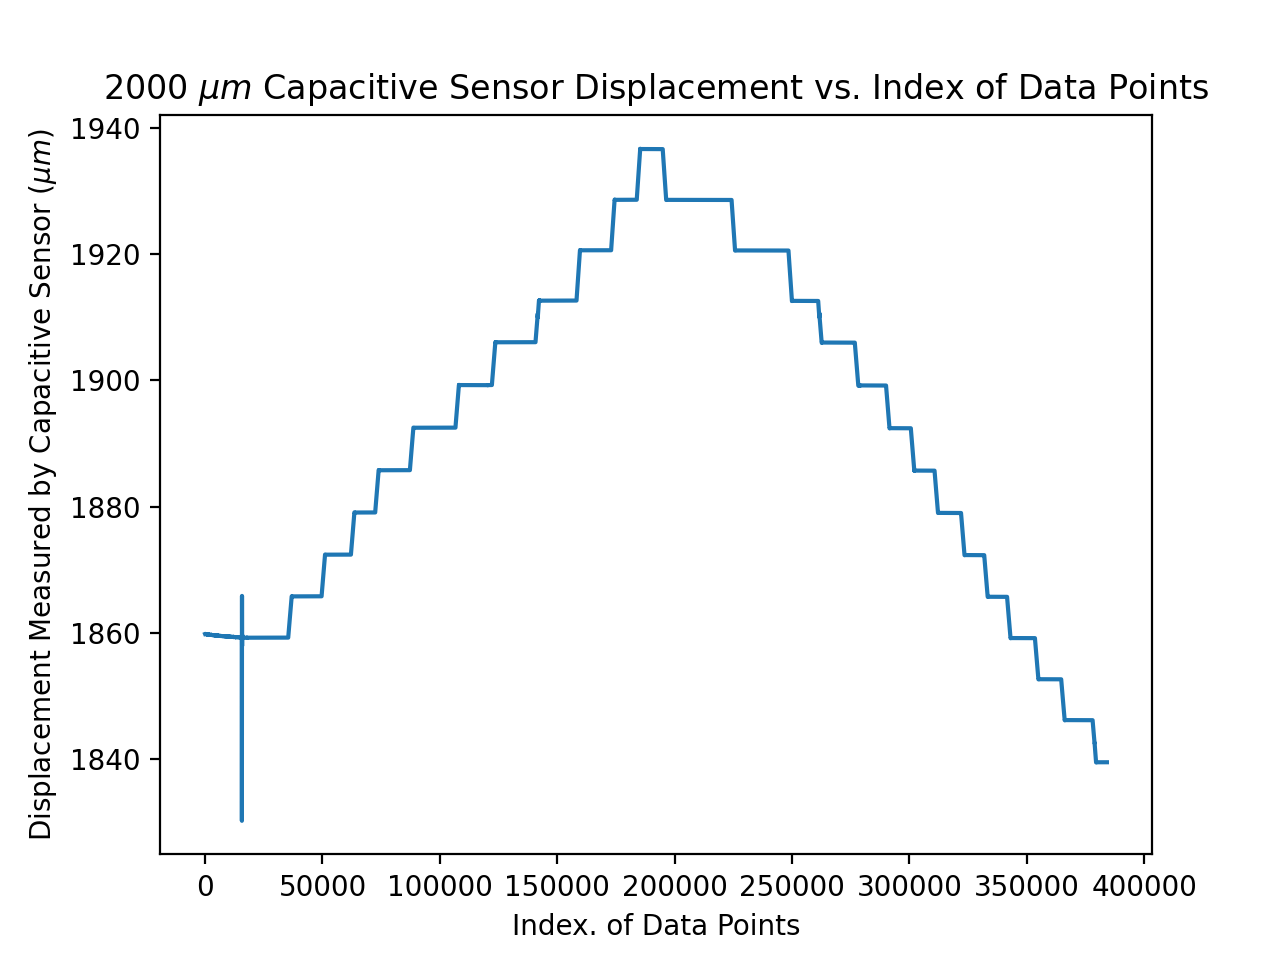

Text(0.5, 1.0, '2000 $\\mu m$ Capacitive Sensor Displacement vs. Index of Data Points')

In [31]:
plt.figure()
plt.plot(df[" Data channel 1 (µm)"])

plt.xlabel('Index. of Data Points')
plt.ylabel('Displacement Measured by Capacitive Sensor $(\mu m)$')
plt.title('2000 $\mu m$ Capacitive Sensor Displacement vs. Index of Data Points')

In [25]:
start=15600
end=15900

In [26]:
print(df[" Data channel 1 (µm)"][start:end].mean())
print(df[" Data channel 1 (µm)"][start:end].std())

1857.3206372666673
7.328138251469011


In [27]:
y = df[" Data channel 1 (µm)"][start:end]
x = (time[start:end] - time[start]).dt.total_seconds()

In [28]:
info = stats.linregress(x,y)
info

LinregressResult(slope=2.01257306883891, intercept=1854.432197677919, rvalue=0.22870817484701728, pvalue=6.390146400205932e-05, stderr=0.4962443495980992, intercept_stderr=0.8230749658184485)

<IPython.core.display.Javascript object>


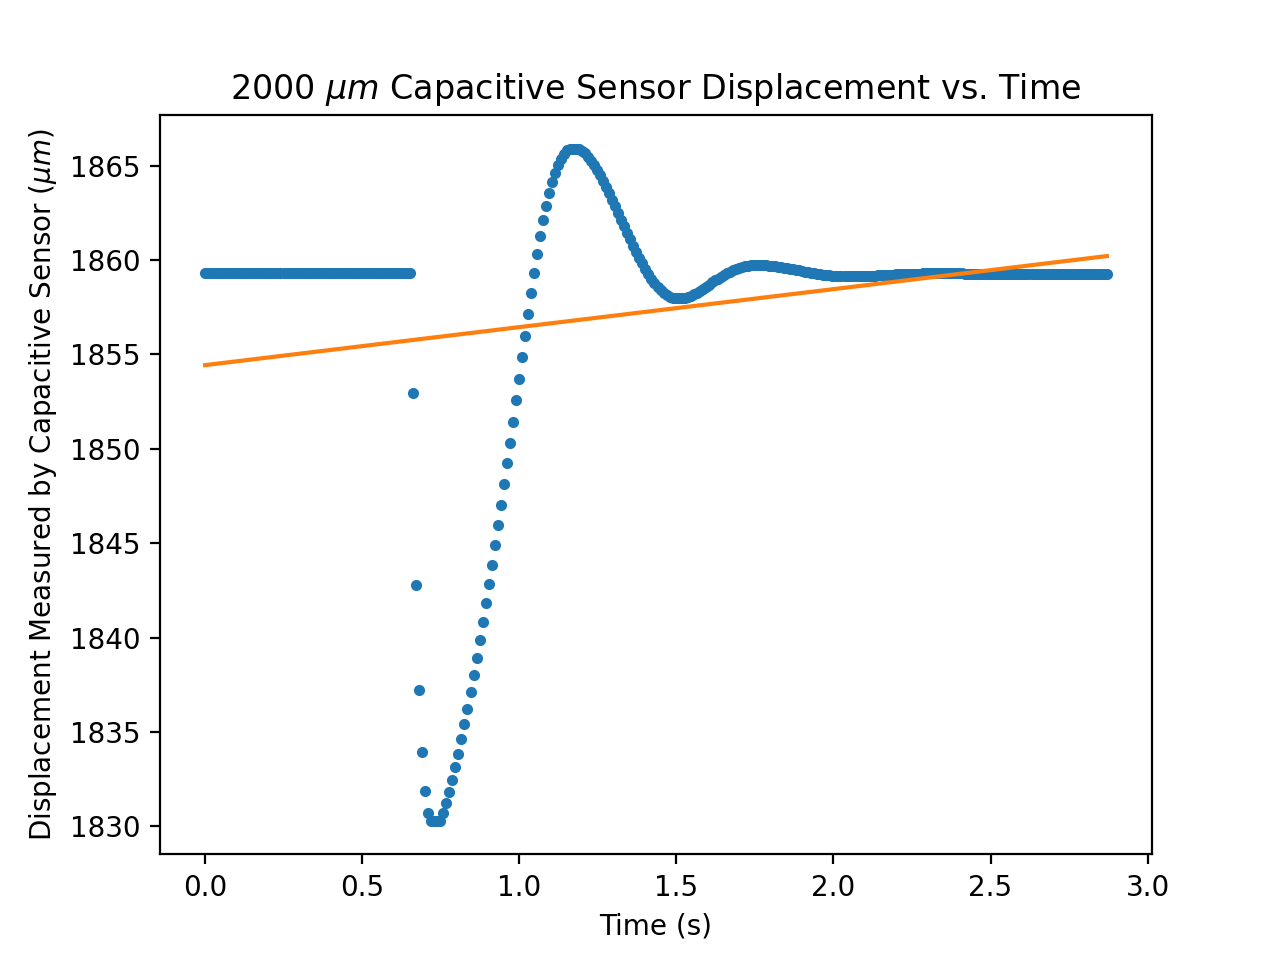

In [32]:
plt.figure()
plt.plot((time[start:end] - time[start]).dt.total_seconds(),df[" Data channel 1 (µm)"][start:end],".")
plt.plot(x,x*info.slope+info.intercept)

plt.xlabel('Time (s)')
plt.ylabel('Displacement Measured by Capacitive Sensor $(\mu m)$')
plt.title('2000 $\mu m$ Capacitive Sensor Displacement vs. Time')

plt.ticklabel_format(useOffset=False)